# Visualisation graphique : histogrammes et boîtes à moustaches

In [1]:
import pandas as pd
df = pd.read_csv("Data/fandango-scores.csv",
                 usecols=['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 
                          'Fandango_Stars'],
                index_col='FILM')
df.head()

,Fandango_Stars,Fandango_Ratingvalue,RT_user_norm,Metacritic_user_nom,IMDB_norm
FILM,,,,,
Avengers: Age of Ultron (2015),5.0,4.5,4.3,3.55,3.90
Cinderella (2015),5.0,4.5,4.0,3.75,3.55
Ant-Man (2015),5.0,4.5,4.5,4.05,3.90
Do You Believe? (2015),5.0,4.5,4.2,2.35,2.70
Hot Tub Time Machine 2 (2015),3.5,3.0,1.4,1.70,2.55


## Distribution de fréquences

In [2]:
# Series.values_counts() pour calculer la fréquence de chaque valeurs d'une Series
df["Fandango_Ratingvalue"].value_counts()

Fandango_Ratingvalue
4.1    16
3.9    12
4.2    12
4.3    11
4.5     9
3.7     9
3.4     9
3.5     9
3.6     8
4.4     7
4.0     7
3.2     5
3.8     5
2.9     5
3.0     4
3.3     4
4.6     4
4.8     3
3.1     3
2.8     2
2.7     2
Name: count, dtype: int64

In [3]:
# Series.sort_index()
freq = df["Fandango_Ratingvalue"].value_counts()
freq.sort_index()

Fandango_Ratingvalue
2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: count, dtype: int64

__À vous !__
>- Utiliser la méthode value_counts() pour retourner le décompte des fréquences de la colonne 'IMDB_norm'. Trier l'objet Series résultant par son index et assigner le résultat à la variable imdb_distribution.
>- Afficher le résultat.

In [4]:
imdb_dist = df.IMDB_norm.value_counts().sort_index()
imdb_dist

IMDB_norm
2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: count, dtype: int64

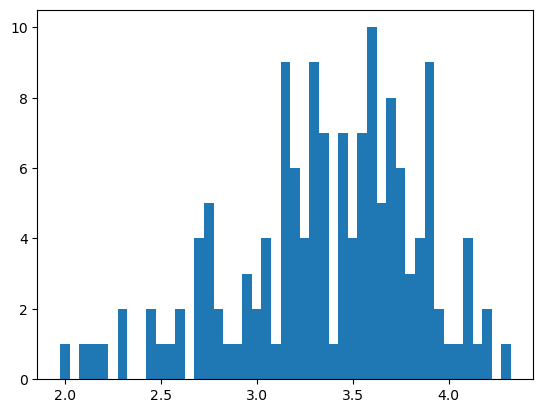

In [5]:
import matplotlib.pyplot as plt
plt.bar(imdb_dist.index, imdb_dist.values, 0.05)
plt.show()

In [6]:
### WARNING: un problème est qu'il y a beaucoup de valeurs uniques (21 pour pour fandango, 41 pour imdb)
# un second problème est qu'il y a une grande différence entre fandango et imdb 
# => une solution est donc de créer une échelle commune pour comparer :
# on va faire des classes (par exemple les notes entre 1 et 2, entre 2 et 3, entre 3 et 4 etc)
# on pourra compter le nombre d'éléments dans chaque classe et les comparer
# c'est le principe d'un histogramme

## Les histogrammes avec Matplotlib

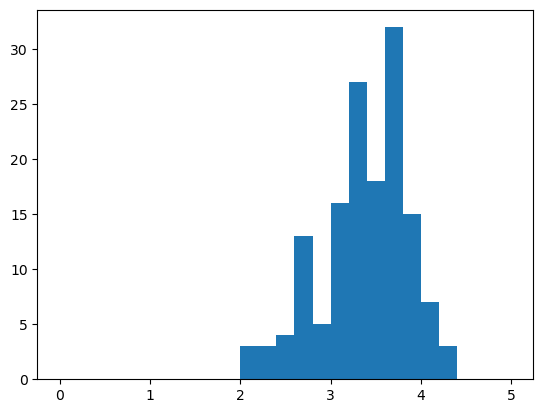

In [7]:
fig, ax = plt.subplots()
ax.hist(df["IMDB_norm"], range=(0,5), bins=25)
plt.show()

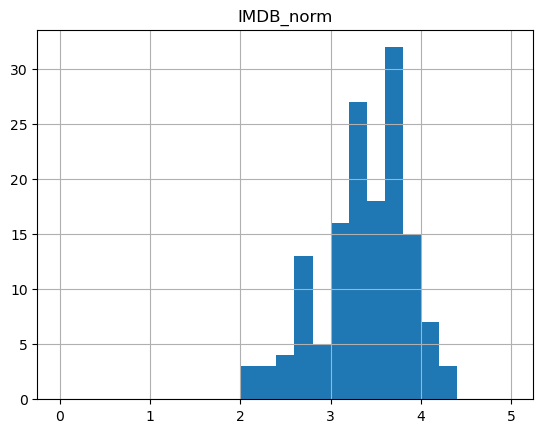

In [8]:
df.hist("IMDB_norm", bins=25, range=(0,5));

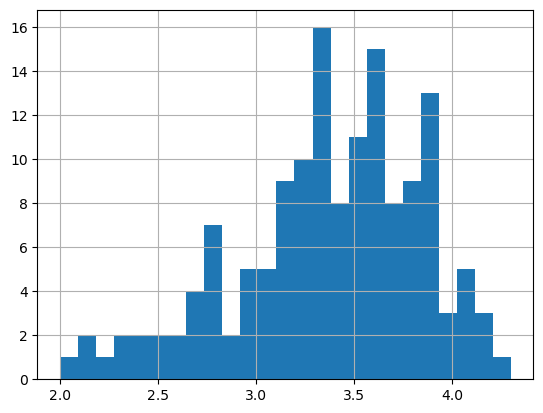

In [9]:
df.IMDB_norm.hist(bins=25);

In [10]:
#Axes.hist(values,range=(a,b), bins) 
### Regarder l'aide pour voir le fonctionnement par défaut !

- Créer un sous-graphique et assigner les objets Figure à la variable fig et Axes à la variable ax.
- Générer un histogramme des valeurs de la colonne 'Fandango_Ratingvalue' en utilisant un range de 0 à 5.  
- Changez le paramètre `bins`. A quoi sert-il?
- Utiliser plt.show() pour afficher le graphique.

## Comparaison d'histogrammes

__À vous !__
>Tracer un graphique avec 4 sous-graphiques:
>- Pour le sous-graphique associé à la variable ax1:
>>- Générer un histogramme des valeurs de la colonne 'Fandango_Ratingvalue' en utilisant 20 classes (bins) et un intervalle de 0 à 5
>- Pour le sous-graphique associé à la variable ax2:
>>- Générer un histogramme des valeurs de la colonne 'RT_user_norm' en utilisant 20 classes (bins) et un intervalle de 0 à 5
>- Pour le sous-graphique associé à la variable ax3:
>>- Générer un histogramme des valeurs de la colonne 'Metacritic_user_nom' en utilisant 20 classes (bins) et un intervalle de 0 à 5
>- Pour le sous-graphique associé à la variable ax4:
>>- Générer un histogramme des valeurs de la colonne 'IMDB_norm' en utilisant 20 classes (bins) et un intervalle de 0 à 5
>- Pour tous les graphiques définir l'intervalle sur l'axe y de 0 à 50 en utilisant Axes.set_ylim() et choisir un titre.
>- Afficher les histogrammes.

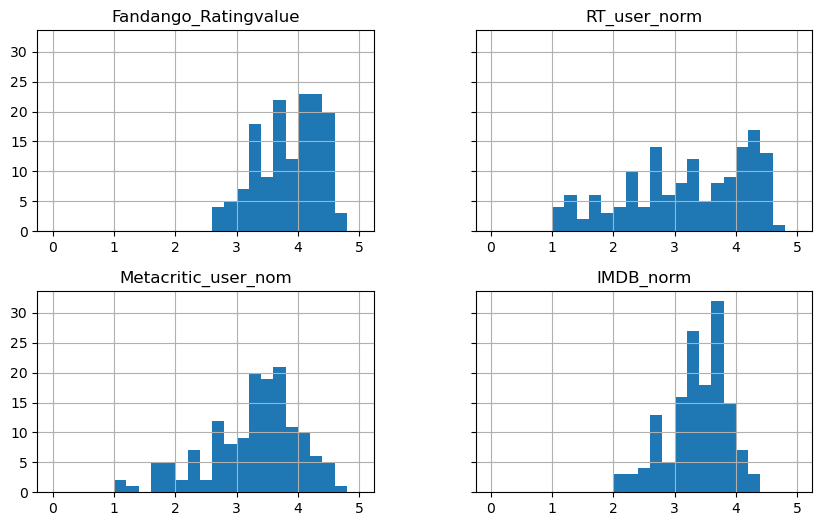

In [19]:
fig, ax = plt.subplots(2,2, sharey=True, figsize=(10,6))

df.hist("Fandango_Ratingvalue", bins=25, range=(0,5), ax=ax[0,0])
df.hist("RT_user_norm", bins=25, range=(0,5), ax=ax[0,1])
df.hist("Metacritic_user_nom", bins=25, range=(0,5), ax=ax[1,0])
df.hist("IMDB_norm", bins=25, range=(0,5), ax=ax[1,1])

plt.show()

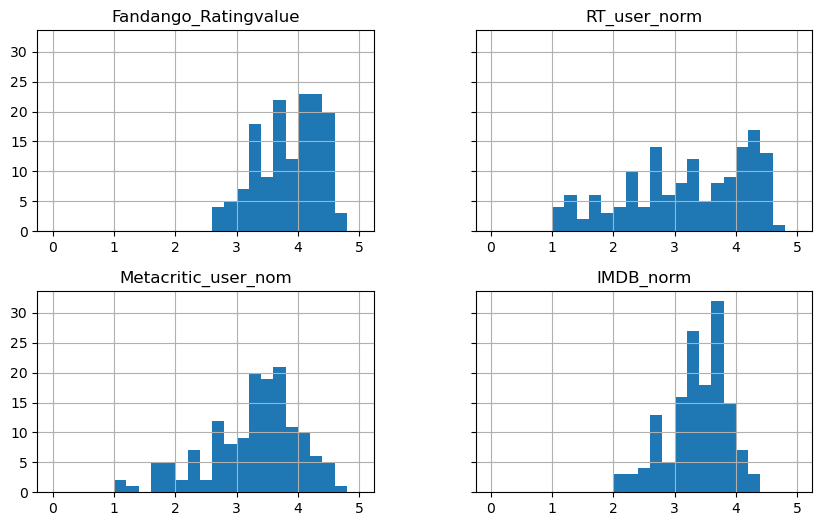

In [24]:
df.hist(["Fandango_Ratingvalue", "RT_user_norm", "Metacritic_user_nom", "IMDB_norm"],
        bins=25, range=(0,5), sharey=True, layout=(2,2), figsize=(10,6));

## Plusieurs diagrammes à boîtes

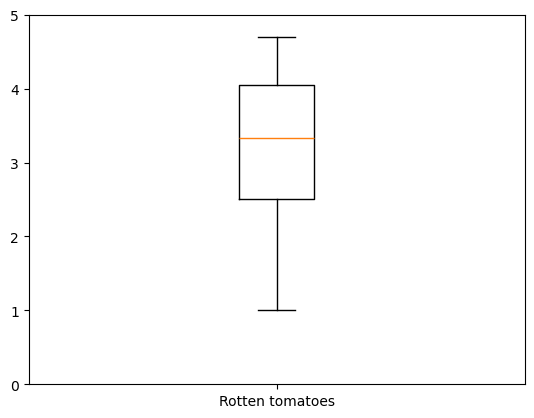

In [26]:
# méthode .boxplot()
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.boxplot(df['RT_user_norm'])
ax.set_xticklabels(['Rotten tomatoes'])
ax.set_ylim(0,5)
plt.show()

__À vous !__
>- Créer un sous-graphique et assigner les objets Figure à la variable fig et Axes à la variable ax.
>- Générer un diagramme à boîtes pour chaque colonne de mes_colonnes = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']. _Indice : pas besoin de boucles! La méthode boxplot interprète d'elle-même chaque colonne d'un dataframe comme autant de boxplots à créer._
>- Définir pour chaque diagramme un intitulé correspondant au nom de la colonne num_cols et faire une rotation de cet intitulé.
>- Définir l'intervalle de l'axe y de 0 à 5.
>- Afficher le graphique.

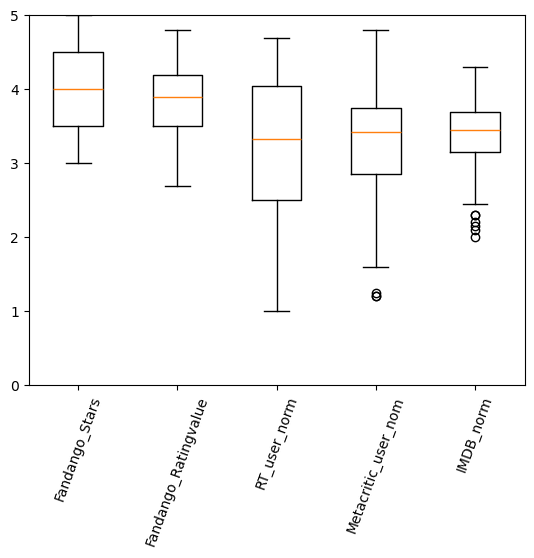

In [31]:
fig, ax = plt.subplots()
ax.boxplot(df)
ax.set_xticklabels(df.columns, rotation=70)
ax.set_ylim(0,5)
plt.show()